In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import norm,probplot
import statsmodels.api as sm

In [25]:
#Generate synthetic data
np.random.seed(42)
n=100
education=np.random.randint(10,20,size=n)
experience=np.random.randint(1,30,size=n)
age=experience + np.random.randint(18,25,size=n)
noise=np.random.normal(0,1000,size=n)
# Target variable: Salary (in thousands)
Salary=3000+150*education+200*experience+5*age+noise

In [31]:
df=pd.DataFrame({
    'Education':education,
    'Experience':experience,
    'age':age,
    'Salary':Salary
})

In [35]:
#Defining X and Y features
x=df[['Education','Experience','age']]  ##Independent variable
y=df[['Salary']]                        ##dependent variable

In [41]:
x=sm.add_constant(x)

In [43]:
model=sm.OLS(y,x).fit()

In [47]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     127.2
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           2.56e-33
Time:                        06:25:45   Log-Likelihood:                -828.60
No. Observations:                 100   AIC:                             1665.
Df Residuals:                      96   BIC:                             1676.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3695.9736   1253.151      2.949      0.0

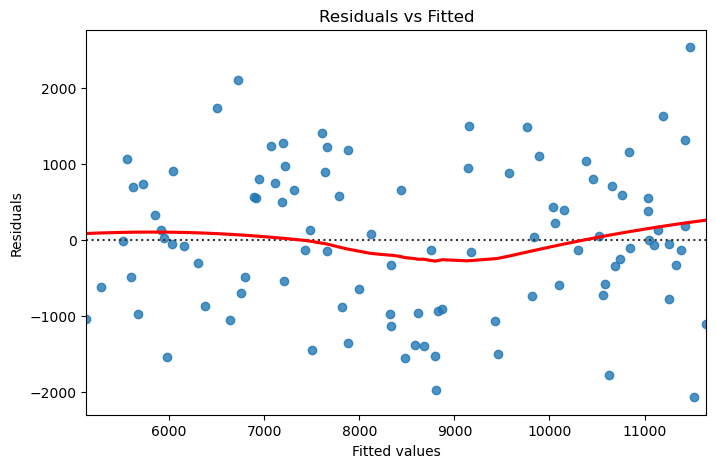

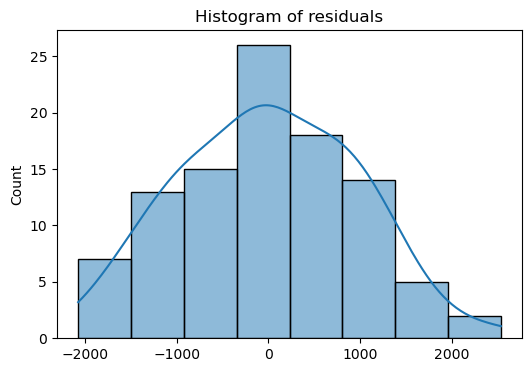

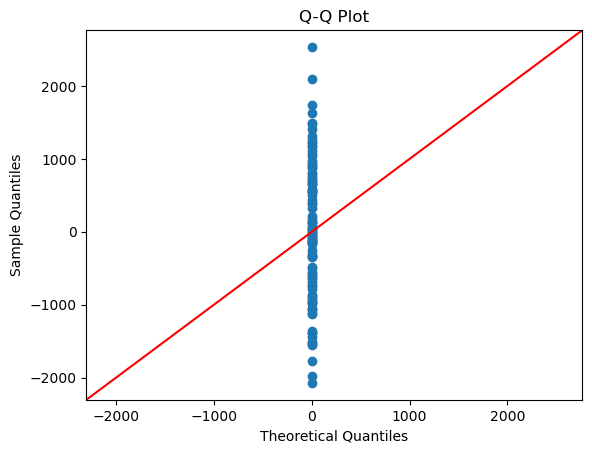

      feature         VIF
0       const  163.546815
1   Education    1.024841
2  Experience   20.125881
3         age   20.108935


In [57]:

# 1. Linearity: Residual vs Fitted
plt.figure(figsize=(8,5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 2. Normality of Residuals
plt.figure(figsize=(6,4))
sns.histplot(model.resid, kde=True)
plt.title("Histogram of residuals")
plt.show()

# Q-Q Plot
sm.qqplot(model.resid, line='45')
plt.title("Q-Q Plot")
plt.show()

# 3. Homoscedasticity: Already seen in Residual vs Fitted

# 4. Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]
print(vif_data)